In [16]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction import FeatureHasher

# ! pip install category_encoders

In [17]:
Health_df = pd.read_csv("../draft/draft_Data/Healthy_Skin_Cancer.csv")
Cancer_df = pd.read_csv("../draft/draft_Data/metadata.csv")

# Health_df and Cancer_df cleaning  as Individual datasets

In [18]:
Health_df

,smoke,drink,skin_cancer_history,age,gender,pesticide,cancer_history,background_father,background_mother,has_piped_water,has_sewage_system
0,No,No,No,22,Female,No,Yes,Saudi,Saudi,Yes,Yes
1,No,No,No,23,Female,No,Yes,Saudi,Saudi,Yes,Yes
2,No,No,No,22,Female,No,Yes,Saudi,Saudi,Yes,Yes
3,No,No,No,37,Female,Yes,No,Saudi,Saudi,Yes,Yes
4,No,No,No,23,Female,No,No,Saudi,Saudi,Yes,Yes
...,...,...,...,...,...,...,...,...,...,...,...
206,No,No,No,23,Female,Yes,Yes,Saudi,Saudi,Yes,Yes
207,No,No,No,27,Female,No,No,Saudi,Saudi,Yes,Yes
208,Yes,Yes,No,23,Male,No,No,Saudi,Saudi,Yes,Yes
209,No,No,No,23,Female,Yes,No,Saudi,Saudi,Yes,No


In [19]:
Health_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211 entries, 0 to 210
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   smoke                211 non-null    object
 1   drink                211 non-null    object
 2   skin_cancer_history  211 non-null    object
 3   age                  211 non-null    int64 
 4   gender               211 non-null    object
 5   pesticide            211 non-null    object
 6   cancer_history       211 non-null    object
 7   background_father    211 non-null    object
 8   background_mother    211 non-null    object
 9   has_piped_water      211 non-null    object
 10  has_sewage_system    211 non-null    object
dtypes: int64(1), object(10)
memory usage: 18.3+ KB


In [20]:
Cancer_df

,patient_id,lesion_id,smoke,drink,background_father,background_mother,age,pesticide,gender,skin_cancer_history,...,diameter_2,diagnostic,itch,grew,hurt,changed,bleed,elevation,img_id,biopsed
0,PAT_1516,1765,NaN,NaN,NaN,NaN,8,NaN,NaN,NaN,...,NaN,NEV,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,PAT_1516_1765_530.png,False
1,PAT_46,881,False,False,POMERANIA,POMERANIA,55,False,FEMALE,True,...,5.0,BCC,TRUE,TRUE,FALSE,TRUE,TRUE,TRUE,PAT_46_881_939.png,True
2,PAT_1545,1867,NaN,NaN,NaN,NaN,77,NaN,NaN,NaN,...,NaN,ACK,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,PAT_1545_1867_547.png,False
3,PAT_1989,4061,NaN,NaN,NaN,NaN,75,NaN,NaN,NaN,...,NaN,ACK,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,PAT_1989_4061_934.png,False
4,PAT_684,1302,False,True,POMERANIA,POMERANIA,79,False,MALE,True,...,5.0,BCC,TRUE,TRUE,FALSE,FALSE,TRUE,TRUE,PAT_684_1302_588.png,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2293,PAT_1708,3156,NaN,NaN,NaN,NaN,73,NaN,NaN,NaN,...,NaN,ACK,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,PAT_1708_3156_175.png,False
2294,PAT_46,880,False,False,POMERANIA,POMERANIA,55,False,FEMALE,True,...,12.0,BCC,TRUE,TRUE,FALSE,TRUE,FALSE,FALSE,PAT_46_880_140.png,True
2295,PAT_1343,1217,NaN,NaN,NaN,NaN,74,NaN,NaN,NaN,...,NaN,SEK,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,PAT_1343_1217_404.png,False
2296,PAT_326,690,False,False,POMERANIA,POMERANIA,58,True,FEMALE,True,...,4.0,BCC,TRUE,FALSE,FALSE,FALSE,FALSE,TRUE,PAT_326_690_823.png,True


In [21]:
Cancer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2298 entries, 0 to 2297
Data columns (total 26 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   patient_id           2298 non-null   object 
 1   lesion_id            2298 non-null   int64  
 2   smoke                1494 non-null   object 
 3   drink                1494 non-null   object 
 4   background_father    1480 non-null   object 
 5   background_mother    1476 non-null   object 
 6   age                  2298 non-null   int64  
 7   pesticide            1494 non-null   object 
 8   gender               1494 non-null   object 
 9   skin_cancer_history  1494 non-null   object 
 10  cancer_history       1494 non-null   object 
 11  has_piped_water      1494 non-null   object 
 12  has_sewage_system    1494 non-null   object 
 13  fitspatrick          1494 non-null   float64
 14  region               2298 non-null   object 
 15  diameter_1           1494 non-null   f

In [22]:
null_attributes = ['smoke', 'drink', 'background_father', 'background_mother', 'pesticide', 'gender', 'skin_cancer_history', 'cancer_history', 'has_piped_water', 'has_sewage_system', 'fitspatrick', 'diameter_1', 'diameter_2']
null_rows = Cancer_df[Cancer_df[null_attributes].isnull().all(axis=1)]
null_rows

,patient_id,lesion_id,smoke,drink,background_father,background_mother,age,pesticide,gender,skin_cancer_history,...,diameter_2,diagnostic,itch,grew,hurt,changed,bleed,elevation,img_id,biopsed
0,PAT_1516,1765,NaN,NaN,NaN,NaN,8,NaN,NaN,NaN,...,NaN,NEV,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,PAT_1516_1765_530.png,False
2,PAT_1545,1867,NaN,NaN,NaN,NaN,77,NaN,NaN,NaN,...,NaN,ACK,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,PAT_1545_1867_547.png,False
3,PAT_1989,4061,NaN,NaN,NaN,NaN,75,NaN,NaN,NaN,...,NaN,ACK,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,PAT_1989_4061_934.png,False
5,PAT_1549,1882,NaN,NaN,NaN,NaN,53,NaN,NaN,NaN,...,NaN,SEK,TRUE,FALSE,FALSE,FALSE,FALSE,TRUE,PAT_1549_1882_230.png,False
8,PAT_1995,4080,NaN,NaN,NaN,NaN,68,NaN,NaN,NaN,...,NaN,ACK,TRUE,FALSE,FALSE,TRUE,FALSE,FALSE,PAT_1995_4080_695.png,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2288,PAT_1407,1402,NaN,NaN,NaN,NaN,81,NaN,NaN,NaN,...,NaN,ACK,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,PAT_1407_1402_562.png,False
2290,PAT_1294,1031,NaN,NaN,NaN,NaN,35,NaN,NaN,NaN,...,NaN,ACK,TRUE,FALSE,TRUE,FALSE,FALSE,FALSE,PAT_1294_1031_466.png,False
2293,PAT_1708,3156,NaN,NaN,NaN,NaN,73,NaN,NaN,NaN,...,NaN,ACK,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,PAT_1708_3156_175.png,False
2295,PAT_1343,1217,NaN,NaN,NaN,NaN,74,NaN,NaN,NaN,...,NaN,SEK,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,PAT_1343_1217_404.png,False


In [23]:
Cancer_df = Cancer_df.drop(null_rows.index)
Cancer_df

,patient_id,lesion_id,smoke,drink,background_father,background_mother,age,pesticide,gender,skin_cancer_history,...,diameter_2,diagnostic,itch,grew,hurt,changed,bleed,elevation,img_id,biopsed
1,PAT_46,881,False,False,POMERANIA,POMERANIA,55,False,FEMALE,True,...,5.0,BCC,TRUE,TRUE,FALSE,TRUE,TRUE,TRUE,PAT_46_881_939.png,True
4,PAT_684,1302,False,True,POMERANIA,POMERANIA,79,False,MALE,True,...,5.0,BCC,TRUE,TRUE,FALSE,FALSE,TRUE,TRUE,PAT_684_1302_588.png,True
6,PAT_778,1471,False,True,GERMANY,ITALY,52,False,FEMALE,False,...,10.0,BCC,FALSE,TRUE,FALSE,TRUE,TRUE,TRUE,PAT_778_1471_835.png,True
7,PAT_117,179,False,False,POMERANIA,POMERANIA,74,True,FEMALE,False,...,10.0,BCC,TRUE,TRUE,TRUE,FALSE,TRUE,TRUE,PAT_117_179_983.png,True
9,PAT_705,4015,False,True,GERMANY,GERMANY,58,True,FEMALE,True,...,7.0,ACK,FALSE,TRUE,FALSE,FALSE,FALSE,FALSE,PAT_705_4015_413.png,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2289,PAT_386,785,True,False,POMERANIA,POMERANIA,66,False,MALE,True,...,15.0,ACK,TRUE,FALSE,TRUE,FALSE,TRUE,TRUE,PAT_386_785_536.png,True
2291,PAT_273,421,False,False,POMERANIA,POMERANIA,41,True,MALE,False,...,5.0,BCC,TRUE,UNK,TRUE,UNK,TRUE,TRUE,PAT_273_421_905.png,True
2292,PAT_491,934,False,False,POMERANIA,POMERANIA,43,True,FEMALE,True,...,5.0,SCC,TRUE,UNK,FALSE,UNK,TRUE,TRUE,PAT_491_934_46.png,True
2294,PAT_46,880,False,False,POMERANIA,POMERANIA,55,False,FEMALE,True,...,12.0,BCC,TRUE,TRUE,FALSE,TRUE,FALSE,FALSE,PAT_46_880_140.png,True


In [24]:
Cancer_df.isnull().sum()

patient_id              0
lesion_id               0
smoke                   0
drink                   0
background_father      14
background_mother      18
age                     0
pesticide               0
gender                  0
skin_cancer_history     0
cancer_history          0
has_piped_water         0
has_sewage_system       0
fitspatrick             0
region                  0
diameter_1              0
diameter_2              0
diagnostic              0
itch                    0
grew                    0
hurt                    0
changed                 0
bleed                   0
elevation               0
img_id                  0
biopsed                 0
dtype: int64

In [25]:
Cancer_df['background_father'].fillna('unknown', inplace=True)
Cancer_df['background_mother'].fillna('unknown', inplace=True)
Cancer_df.isnull().sum()

/var/folders/jh/zgqt24qj3_n6m12h05s8spkr0000gn/T/ipykernel_6263/2307630522.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  Cancer_df['background_father'].fillna('unknown', inplace=True)
/var/folders/jh/zgqt24qj3_n6m12h05s8spkr0000gn/T/ipykernel_6263/2307630522.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting

patient_id             0
lesion_id              0
smoke                  0
drink                  0
background_father      0
background_mother      0
age                    0
pesticide              0
gender                 0
skin_cancer_history    0
cancer_history         0
has_piped_water        0
has_sewage_system      0
fitspatrick            0
region                 0
diameter_1             0
diameter_2             0
diagnostic             0
itch                   0
grew                   0
hurt                   0
changed                0
bleed                  0
elevation              0
img_id                 0
biopsed                0
dtype: int64

In [26]:
Cancer_df.drop(['patient_id', 'lesion_id','img_id'], axis=1, inplace=True)


In [27]:
Cancer_df.to_csv('../draft/draft_Data/Clean_Skin_Cancer.csv', index=False)


In [28]:
Health_df

,smoke,drink,skin_cancer_history,age,gender,pesticide,cancer_history,background_father,background_mother,has_piped_water,has_sewage_system
0,No,No,No,22,Female,No,Yes,Saudi,Saudi,Yes,Yes
1,No,No,No,23,Female,No,Yes,Saudi,Saudi,Yes,Yes
2,No,No,No,22,Female,No,Yes,Saudi,Saudi,Yes,Yes
3,No,No,No,37,Female,Yes,No,Saudi,Saudi,Yes,Yes
4,No,No,No,23,Female,No,No,Saudi,Saudi,Yes,Yes
...,...,...,...,...,...,...,...,...,...,...,...
206,No,No,No,23,Female,Yes,Yes,Saudi,Saudi,Yes,Yes
207,No,No,No,27,Female,No,No,Saudi,Saudi,Yes,Yes
208,Yes,Yes,No,23,Male,No,No,Saudi,Saudi,Yes,Yes
209,No,No,No,23,Female,Yes,No,Saudi,Saudi,Yes,No


In [29]:
# Aligning column names and data types where necessary

# Mapping of column names from healthy to clean dataset where they directly correspond
column_name_mapping = {
    'smoke': 'smoke',
    'drink': 'drink',
    'skin_cancer_history': 'skin_cancer_history',
    'age': 'age',
    'gender': 'gender',
    'pesticide': 'pesticide',
    'cancer_history': 'cancer_history',
    'background_father': 'background_father',
    'background_mother': 'background_mother',
    'has_piped_water': 'has_piped_water',
    'has_sewage_system': 'has_sewage_system'
}

# Adjusting values in the healthy dataset to match the format of the clean dataset
# For boolean columns, mapping 'Yes'/'No' to True/False respectively
boolean_columns = ['smoke', 'drink', 'skin_cancer_history', 'pesticide', 'cancer_history', 'has_piped_water', 'has_sewage_system']
for col in boolean_columns:
    Health_df[col] = Health_df[col].map({'Yes': True, 'No': False})

# For gender, ensuring consistency
gender_mapping = {'Female': 'FEMALE', 'Male': 'MALE'}
Health_df['gender'] = Health_df['gender'].map(gender_mapping)

# Renaming columns in the healthy dataset to match the clean dataset
healthy_skin_cancer_df_renamed = Health_df.rename(columns=column_name_mapping)

# Combining the datasets
combined_df = pd.concat([Cancer_df, healthy_skin_cancer_df_renamed], ignore_index=True, sort=False)

# Displaying the first few rows of the combined dataframe and its info to verify the merge



In [30]:
# save to csv
combined_df.to_csv('../draft/draft_Data/combined_skin_cancer.csv', index=False)
combined_df

,smoke,drink,background_father,background_mother,age,pesticide,gender,skin_cancer_history,cancer_history,has_piped_water,...,diameter_1,diameter_2,diagnostic,itch,grew,hurt,changed,bleed,elevation,biopsed
0,False,False,POMERANIA,POMERANIA,55,False,FEMALE,True,True,True,...,6.0,5.0,BCC,TRUE,TRUE,FALSE,TRUE,TRUE,TRUE,True
1,False,True,POMERANIA,POMERANIA,79,False,MALE,True,False,False,...,5.0,5.0,BCC,TRUE,TRUE,FALSE,FALSE,TRUE,TRUE,True
2,False,True,GERMANY,ITALY,52,False,FEMALE,False,True,True,...,15.0,10.0,BCC,FALSE,TRUE,FALSE,TRUE,TRUE,TRUE,True
3,False,False,POMERANIA,POMERANIA,74,True,FEMALE,False,False,False,...,15.0,10.0,BCC,TRUE,TRUE,TRUE,FALSE,TRUE,TRUE,True
4,False,True,GERMANY,GERMANY,58,True,FEMALE,True,True,True,...,9.0,7.0,ACK,FALSE,TRUE,FALSE,FALSE,FALSE,FALSE,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1700,False,False,Saudi,Saudi,23,True,FEMALE,False,True,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1701,False,False,Saudi,Saudi,27,False,FEMALE,False,False,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1702,True,True,Saudi,Saudi,23,False,MALE,False,False,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1703,False,False,Saudi,Saudi,23,True,FEMALE,False,False,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Cleaning the combined data

In [31]:
df = pd.read_csv('../draft/draft_Data/combined_skin_cancer.csv')
df

,smoke,drink,background_father,background_mother,age,pesticide,gender,skin_cancer_history,cancer_history,has_piped_water,...,diameter_1,diameter_2,diagnostic,itch,grew,hurt,changed,bleed,elevation,biopsed
0,False,False,POMERANIA,POMERANIA,55,False,FEMALE,True,True,True,...,6.0,5.0,BCC,TRUE,TRUE,FALSE,TRUE,TRUE,TRUE,True
1,False,True,POMERANIA,POMERANIA,79,False,MALE,True,False,False,...,5.0,5.0,BCC,TRUE,TRUE,FALSE,FALSE,TRUE,TRUE,True
2,False,True,GERMANY,ITALY,52,False,FEMALE,False,True,True,...,15.0,10.0,BCC,FALSE,TRUE,FALSE,TRUE,TRUE,TRUE,True
3,False,False,POMERANIA,POMERANIA,74,True,FEMALE,False,False,False,...,15.0,10.0,BCC,TRUE,TRUE,TRUE,FALSE,TRUE,TRUE,True
4,False,True,GERMANY,GERMANY,58,True,FEMALE,True,True,True,...,9.0,7.0,ACK,FALSE,TRUE,FALSE,FALSE,FALSE,FALSE,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1700,False,False,Saudi,Saudi,23,True,FEMALE,False,True,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1701,False,False,Saudi,Saudi,27,False,FEMALE,False,False,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1702,True,True,Saudi,Saudi,23,False,MALE,False,False,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1703,False,False,Saudi,Saudi,23,True,FEMALE,False,False,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1705 entries, 0 to 1704
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   smoke                1705 non-null   bool   
 1   drink                1705 non-null   bool   
 2   background_father    1705 non-null   object 
 3   background_mother    1705 non-null   object 
 4   age                  1705 non-null   int64  
 5   pesticide            1705 non-null   bool   
 6   gender               1705 non-null   object 
 7   skin_cancer_history  1705 non-null   bool   
 8   cancer_history       1705 non-null   bool   
 9   has_piped_water      1705 non-null   bool   
 10  has_sewage_system    1705 non-null   bool   
 11  fitspatrick          1494 non-null   float64
 12  region               1494 non-null   object 
 13  diameter_1           1494 non-null   float64
 14  diameter_2           1494 non-null   float64
 15  diagnostic           1494 non-null   o

In [33]:
df.drop(['fitspatrick','region','diameter_1','diameter_2','itch','grew','hurt','changed','bleed','elevation','biopsed'], axis=1, inplace=True)

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1705 entries, 0 to 1704
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   smoke                1705 non-null   bool  
 1   drink                1705 non-null   bool  
 2   background_father    1705 non-null   object
 3   background_mother    1705 non-null   object
 4   age                  1705 non-null   int64 
 5   pesticide            1705 non-null   bool  
 6   gender               1705 non-null   object
 7   skin_cancer_history  1705 non-null   bool  
 8   cancer_history       1705 non-null   bool  
 9   has_piped_water      1705 non-null   bool  
 10  has_sewage_system    1705 non-null   bool  
 11  diagnostic           1494 non-null   object
dtypes: bool(7), int64(1), object(4)
memory usage: 78.4+ KB


In [35]:
df

,smoke,drink,background_father,background_mother,age,pesticide,gender,skin_cancer_history,cancer_history,has_piped_water,has_sewage_system,diagnostic
0,False,False,POMERANIA,POMERANIA,55,False,FEMALE,True,True,True,True,BCC
1,False,True,POMERANIA,POMERANIA,79,False,MALE,True,False,False,False,BCC
2,False,True,GERMANY,ITALY,52,False,FEMALE,False,True,True,True,BCC
3,False,False,POMERANIA,POMERANIA,74,True,FEMALE,False,False,False,False,BCC
4,False,True,GERMANY,GERMANY,58,True,FEMALE,True,True,True,True,ACK
...,...,...,...,...,...,...,...,...,...,...,...,...
1700,False,False,Saudi,Saudi,23,True,FEMALE,False,True,True,True,NaN
1701,False,False,Saudi,Saudi,27,False,FEMALE,False,False,True,True,NaN
1702,True,True,Saudi,Saudi,23,False,MALE,False,False,True,True,NaN
1703,False,False,Saudi,Saudi,23,True,FEMALE,False,False,True,False,NaN


In [36]:
df[df.select_dtypes(include=['object']).columns] = df.select_dtypes(include=['object']).astype(str).apply(lambda x: x.str.upper())
df

,smoke,drink,background_father,background_mother,age,pesticide,gender,skin_cancer_history,cancer_history,has_piped_water,has_sewage_system,diagnostic
0,False,False,POMERANIA,POMERANIA,55,False,FEMALE,True,True,True,True,BCC
1,False,True,POMERANIA,POMERANIA,79,False,MALE,True,False,False,False,BCC
2,False,True,GERMANY,ITALY,52,False,FEMALE,False,True,True,True,BCC
3,False,False,POMERANIA,POMERANIA,74,True,FEMALE,False,False,False,False,BCC
4,False,True,GERMANY,GERMANY,58,True,FEMALE,True,True,True,True,ACK
...,...,...,...,...,...,...,...,...,...,...,...,...
1700,False,False,SAUDI,SAUDI,23,True,FEMALE,False,True,True,True,NAN
1701,False,False,SAUDI,SAUDI,27,False,FEMALE,False,False,True,True,NAN
1702,True,True,SAUDI,SAUDI,23,False,MALE,False,False,True,True,NAN
1703,False,False,SAUDI,SAUDI,23,True,FEMALE,False,False,True,False,NAN


In [37]:
def print_unique_col_values(df):
    for column in df:
        #  if df[column].dtype == 'object':
        print(f'{column}: {df[column].unique()}')

In [38]:
print_unique_col_values(df)

smoke: [False  True]
drink: [False  True]
background_father: ['POMERANIA' 'GERMANY' 'BRAZIL' 'NETHERLANDS' 'ITALY' 'POLAND' 'UNK'
 'PORTUGAL' 'UNKNOWN' 'BRASIL' 'CZECH' 'AUSTRIA' 'SPAIN' 'ISRAEL' 'SAUDI'
 'SAUDI ' 'BAHRAINI' 'BAHRAINI ' 'EGYPTIAN ']
background_mother: ['POMERANIA' 'ITALY' 'GERMANY' 'BRAZIL' 'UNK' 'UNKNOWN' 'POLAND' 'NORWAY'
 'PORTUGAL' 'NETHERLANDS' 'FRANCE' 'SPAIN' 'SAUDI' 'SAUDI ' 'BAHRAINI'
 'EGYPTIAN ' 'KUWAITI']
age: [55 79 52 74 58 34 78 77 60 64 61 71 38 54 82 62 63 49 31 36 75 44 56 80
 76 48 51 47 35 87 53 69 59 57 83 92 67 46 66 70 85 41 65 72 14 21 94 73
 43 90 89 39 26 40 13 30 68 50 22 81 84 88 86 37 32 45 27 33 20 91 42 17
 16 24 23 19 18 25]
pesticide: [False  True]
gender: ['FEMALE' 'MALE']
skin_cancer_history: [ True False]
cancer_history: [ True False]
has_piped_water: [ True False]
has_sewage_system: [ True False]
diagnostic: ['BCC' 'ACK' 'SCC' 'SEK' 'NEV' 'MEL' 'NAN']


In [39]:
# print unique values in diagnosis
df['diagnostic'].unique()
# REPLACE nAn with healthy
df['diagnostic'] = df['diagnostic'].replace({'NAN':'HEALTHY'})

In [40]:
df['diagnostic'].unique()
diagnosis=['BCC', 'ACK', 'SCC', 'SEK', 'NEV', 'MEL']

df['diagnostic'] = df['diagnostic'].replace(diagnosis, 1).fillna(0)

df['diagnostic'] = df['diagnostic'].replace({'HEALTHY':0})


/var/folders/jh/zgqt24qj3_n6m12h05s8spkr0000gn/T/ipykernel_6263/2960035127.py:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['diagnostic'] = df['diagnostic'].replace({'HEALTHY':0})


In [41]:
df['diagnostic'].unique()

array([1, 0])

In [42]:
df.diagnostic.value_counts()

diagnostic
1    1494
0     211
Name: count, dtype: int64

In [43]:
# gender replace with 0 and 1
df['gender'] = df['gender'].replace({'FEMALE': 0, 'MALE': 1})

/var/folders/jh/zgqt24qj3_n6m12h05s8spkr0000gn/T/ipykernel_6263/3579357169.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['gender'] = df['gender'].replace({'FEMALE': 0, 'MALE': 1})


In [44]:
df['background_father'] = df['background_father'].replace({'UNK':'UNKNOWN'})
df['background_mother'] = df['background_mother'].replace({'UNK':'UNKNOWN'})

In [45]:
df.isnull().sum()

smoke                  0
drink                  0
background_father      0
background_mother      0
age                    0
pesticide              0
gender                 0
skin_cancer_history    0
cancer_history         0
has_piped_water        0
has_sewage_system      0
diagnostic             0
dtype: int64

In [46]:
df

,smoke,drink,background_father,background_mother,age,pesticide,gender,skin_cancer_history,cancer_history,has_piped_water,has_sewage_system,diagnostic
0,False,False,POMERANIA,POMERANIA,55,False,0,True,True,True,True,1
1,False,True,POMERANIA,POMERANIA,79,False,1,True,False,False,False,1
2,False,True,GERMANY,ITALY,52,False,0,False,True,True,True,1
3,False,False,POMERANIA,POMERANIA,74,True,0,False,False,False,False,1
4,False,True,GERMANY,GERMANY,58,True,0,True,True,True,True,1
...,...,...,...,...,...,...,...,...,...,...,...,...
1700,False,False,SAUDI,SAUDI,23,True,0,False,True,True,True,0
1701,False,False,SAUDI,SAUDI,27,False,0,False,False,True,True,0
1702,True,True,SAUDI,SAUDI,23,False,1,False,False,True,True,0
1703,False,False,SAUDI,SAUDI,23,True,0,False,False,True,False,0


In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1705 entries, 0 to 1704
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   smoke                1705 non-null   bool  
 1   drink                1705 non-null   bool  
 2   background_father    1705 non-null   object
 3   background_mother    1705 non-null   object
 4   age                  1705 non-null   int64 
 5   pesticide            1705 non-null   bool  
 6   gender               1705 non-null   int64 
 7   skin_cancer_history  1705 non-null   bool  
 8   cancer_history       1705 non-null   bool  
 9   has_piped_water      1705 non-null   bool  
 10  has_sewage_system    1705 non-null   bool  
 11  diagnostic           1705 non-null   int64 
dtypes: bool(7), int64(3), object(2)
memory usage: 78.4+ KB


In [48]:
print_unique_col_values(df)

smoke: [False  True]
drink: [False  True]
background_father: ['POMERANIA' 'GERMANY' 'BRAZIL' 'NETHERLANDS' 'ITALY' 'POLAND' 'UNKNOWN'
 'PORTUGAL' 'BRASIL' 'CZECH' 'AUSTRIA' 'SPAIN' 'ISRAEL' 'SAUDI' 'SAUDI '
 'BAHRAINI' 'BAHRAINI ' 'EGYPTIAN ']
background_mother: ['POMERANIA' 'ITALY' 'GERMANY' 'BRAZIL' 'UNKNOWN' 'POLAND' 'NORWAY'
 'PORTUGAL' 'NETHERLANDS' 'FRANCE' 'SPAIN' 'SAUDI' 'SAUDI ' 'BAHRAINI'
 'EGYPTIAN ' 'KUWAITI']
age: [55 79 52 74 58 34 78 77 60 64 61 71 38 54 82 62 63 49 31 36 75 44 56 80
 76 48 51 47 35 87 53 69 59 57 83 92 67 46 66 70 85 41 65 72 14 21 94 73
 43 90 89 39 26 40 13 30 68 50 22 81 84 88 86 37 32 45 27 33 20 91 42 17
 16 24 23 19 18 25]
pesticide: [False  True]
gender: [0 1]
skin_cancer_history: [ True False]
cancer_history: [ True False]
has_piped_water: [ True False]
has_sewage_system: [ True False]
diagnostic: [1 0]


In [49]:

len(df.background_father.unique())

18

In [50]:
# save to csv   
df.to_csv('../draft/draft_Data/cleaned_combined_skin_cancer.csv', index=False)

In [51]:
df1 = df.copy()
df1.drop(['background_father', 'background_mother','drink'], axis=1, inplace=True)
df1.to_csv('../Data/Final_skin_cancer.csv', index=False)

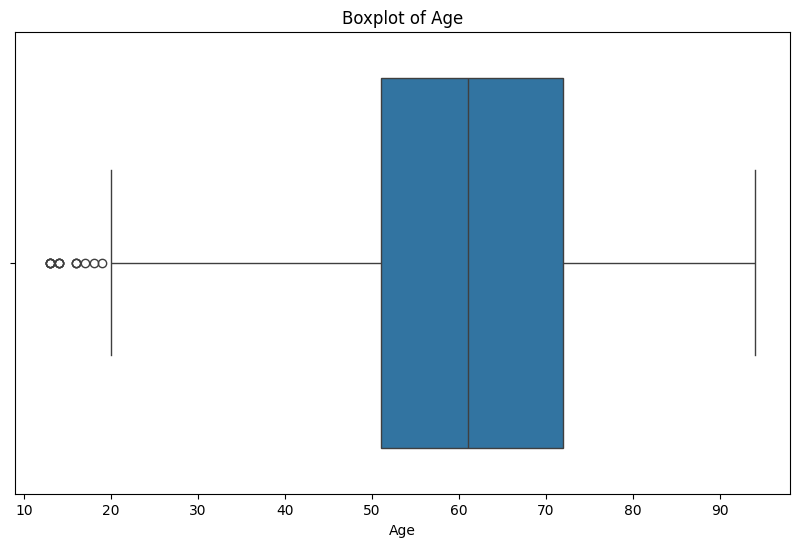

In [52]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df1, x='age')
plt.title('Boxplot of Age')
plt.xlabel('Age')
plt.show()

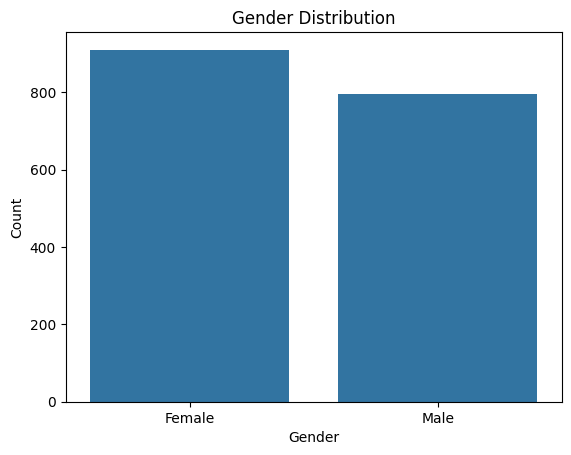

In [53]:
# sns.countplot(data=df1, x='gender')
# plt.title('Gender Distribution')
# plt.xlabel('Gender')
# plt.ylabel('Count')
# plt.show()

sns.countplot(data=df1, x='gender')
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')

# Assuming 'gender' column has encoded females as 0 and males as 1
plt.xticks([0, 1], ['Female', 'Male'])

plt.show()


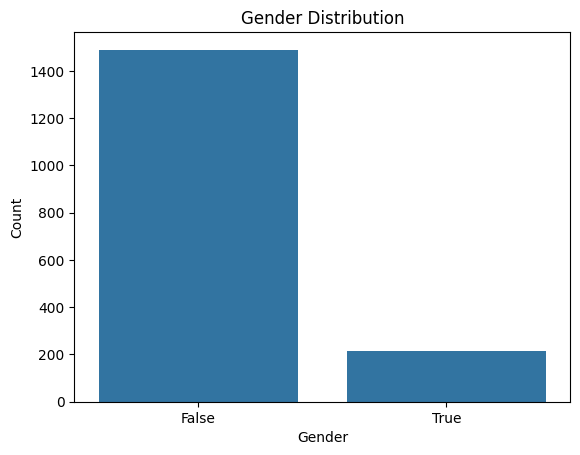

In [54]:
sns.countplot(data=df1, x='smoke')
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

In [55]:
from sklearn.feature_extraction import FeatureHasher
import pandas as pd

# Assuming df is your DataFrame

# Convert each cell to a list containing one string
df['background_mother'] = df['background_mother'].apply(lambda x: [str(x)])
df['background_father'] = df['background_father'].apply(lambda x: [str(x)])

# Initialize FeatureHasher with different n_features for each column
hasher_mother = FeatureHasher(n_features=16, input_type='string')
hasher_father = FeatureHasher(n_features=18, input_type='string')

# Apply the hasher separately
# For background_mother
hashed_mother = hasher_mother.fit_transform(df['background_mother'])
hashed_mother_df = pd.DataFrame(hashed_mother.toarray())

# For background_father
hashed_father = hasher_father.fit_transform(df['background_father'])
hashed_father_df = pd.DataFrame(hashed_father.toarray())

# Optionally, rename the columns to reflect the hashed feature origin
hashed_mother_df.columns = ['mother_hash_' + str(i) for i in range(16)]
hashed_father_df.columns = ['father_hash_' + str(i) for i in range(18)]

# Concatenate the hashed features back to the original DataFrame
df_final = pd.concat([df.drop(['background_mother', 'background_father'], axis=1), hashed_mother_df, hashed_father_df], axis=1)

# Display the first few rows to verify the adjustment
df_final.head()


,smoke,drink,age,pesticide,gender,skin_cancer_history,cancer_history,has_piped_water,has_sewage_system,diagnostic,...,father_hash_8,father_hash_9,father_hash_10,father_hash_11,father_hash_12,father_hash_13,father_hash_14,father_hash_15,father_hash_16,father_hash_17
0,False,False,55,False,0,True,True,True,True,1,...,0.0,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,False,True,79,False,1,True,False,False,False,1,...,0.0,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,False,True,52,False,0,False,True,True,True,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,False,False,74,True,0,False,False,False,False,1,...,0.0,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,False,True,58,True,0,True,True,True,True,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [56]:
df_final.to_csv('../Data/hashed_Final_skin_cancer.csv', index=False)

In [57]:
# Statistical Analysis for Numerical Features min max mean std  
df1.describe()


,age,gender,diagnostic
count,1705.000000,1705.000000,1705.000000
mean,60.222287,0.466276,0.876246
std,16.297858,0.499008,0.329397
min,13.000000,0.000000,0.000000
25%,51.000000,0.000000,1.000000
50%,61.000000,0.000000,1.000000
75%,72.000000,1.000000,1.000000
max,94.000000,1.000000,1.000000


In [58]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1705 entries, 0 to 1704
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   smoke                1705 non-null   bool 
 1   age                  1705 non-null   int64
 2   pesticide            1705 non-null   bool 
 3   gender               1705 non-null   int64
 4   skin_cancer_history  1705 non-null   bool 
 5   cancer_history       1705 non-null   bool 
 6   has_piped_water      1705 non-null   bool 
 7   has_sewage_system    1705 non-null   bool 
 8   diagnostic           1705 non-null   int64
dtypes: bool(6), int64(3)
memory usage: 50.1 KB
